In [1]:
###
#
# This program demonstrates using the keras library to explore deep learning. This code is orinally authored by Joseph Lee Wei En, retrieved
# from the site https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce. 
# Only minor changes were made to the original code.
#
# Author: Anushri Kartik-Narayan
# Assignment: Homework 11
# Part: Exercise 3.b
# Class: CIS2532-NET02
# Professor: Sheikh Shamsuddin
# Submitted 12/04/2020
#
###

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from skimage.transform import resize
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print("x_train shape:", x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [5]:
print("y_train shape:", y_train.shape)

y_train shape: (50000, 1)


In [6]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


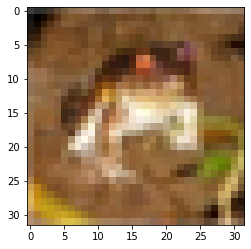

In [7]:
img = plt.imshow(x_train[0])

In [8]:
print("The label is:", y_train[0])

The label is: [6]


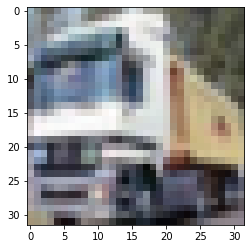

In [9]:
img = plt.imshow(x_train[1])

In [10]:
print("The label is:", y_train[1])

The label is: [9]


In [11]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [12]:
print("The one hot label is:", y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

In [17]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(512, activation='relu'))

In [23]:
model.add(Dropout(0.5))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=32, epochs=20,
                 validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 182s 146ms/step - loss: 1.5436 - accuracy: 0.4345 - val_loss: 1.1813 - val_accuracy: 0.5742
Epoch 2/20
1250/1250 [==============================] - 172s 138ms/step - loss: 1.1093 - accuracy: 0.6055 - val_loss: 0.9066 - val_accuracy: 0.6828
Epoch 3/20
1250/1250 [==============================] - 2173s 2s/step - loss: 0.9342 - accuracy: 0.6722 - val_loss: 0.8210 - val_accuracy: 0.7101
Epoch 4/20
1250/1250 [==============================] - 221s 177ms/step - loss: 0.8290 - accuracy: 0.7095 - val_loss: 0.7776 - val_accuracy: 0.7280
Epoch 5/20
1250/1250 [==============================] - 213s 171ms/step - loss: 0.7548 - accuracy: 0.7333 - val_loss: 0.7376 - val_accuracy: 0.7442
Epoch 6/20
1250/1250 [==============================] - 218s 174ms/step - loss: 0.7000 - accuracy: 0.7545 - val_loss: 0.6961 - val_accuracy: 0.7600
Epoch 7/20
1250/1250 [==============================] - 234s 188ms/step - loss: 0.6479 - accuracy: 0.7712 - val_lo

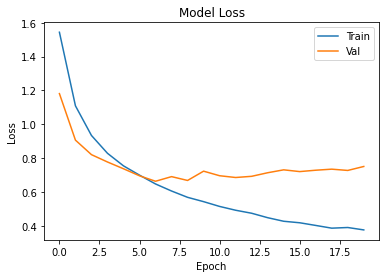

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

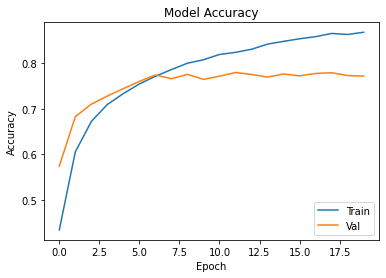

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 8s 24ms/step - loss: 0.7862 - accuracy: 0.7589


0.758899986743927

In [31]:
model.save('my_cifar10_model.h5')

In [32]:
my_image = plt.imread('cat.jpg')

In [33]:
my_image_resized = resize(my_image, (32, 32, 3))

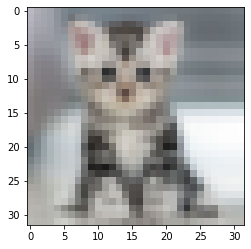

In [34]:
img = plt.imshow(my_image_resized)

In [35]:
probabilities = model.predict(np.array([my_image_resized]))

In [36]:
probabilities

array([[6.8094528e-07, 3.7637246e-08, 1.2066759e-03, 1.0076359e-01,
        9.4199128e-04, 8.5477489e-01, 2.4886482e-04, 4.2012636e-02,
        2.4799070e-05, 2.5867519e-05]], dtype=float32)

In [37]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0, :])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0, index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0, index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0, index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0, index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0, index[5]])

Most likely class: dog -- Probability: 0.8547749
Second most likely class: cat -- Probability: 0.10076359
Third most likely class: horse -- Probability: 0.042012636
Fourth most likely class: bird -- Probability: 0.0012066759
Fifth most likely class: deer -- Probability: 0.0009419913
